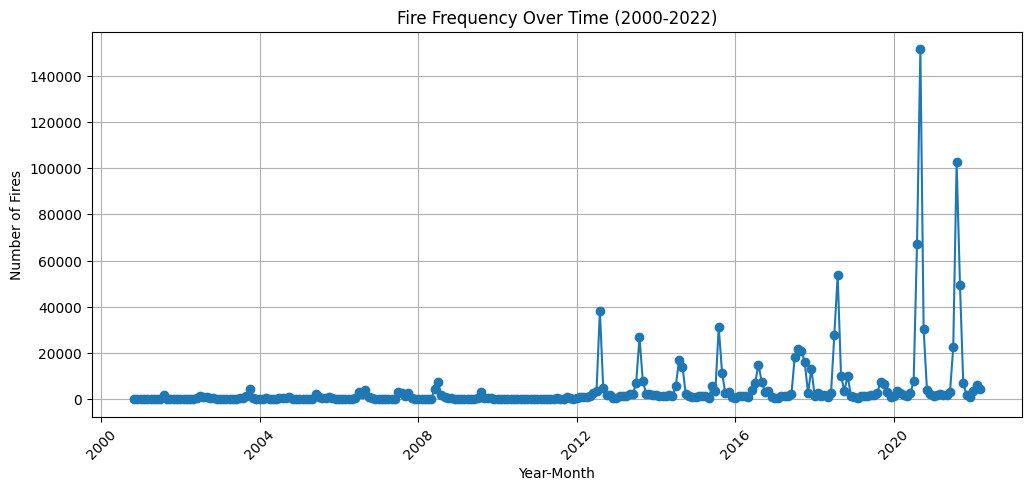

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./frequency/frequency_data/ca_daily_fire_2000_03252022.csv")

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

df['Year-Month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)  # Ensuring two-digit month format

fire_counts = df['Year-Month'].value_counts().sort_index()

fire_counts_df = fire_counts.reset_index()
fire_counts_df.columns = ['Year-Month', 'Fire Count']
fire_counts_df['Year-Month'] = pd.to_datetime(fire_counts_df['Year-Month'], format='%Y-%m')

plt.figure(figsize=(12, 5))
plt.plot(fire_counts_df['Year-Month'], fire_counts_df['Fire Count'], marker='o', linestyle='-')
plt.xlabel("Year-Month")
plt.ylabel("Number of Fires")
plt.title("Fire Frequency Over Time (2000-2022)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

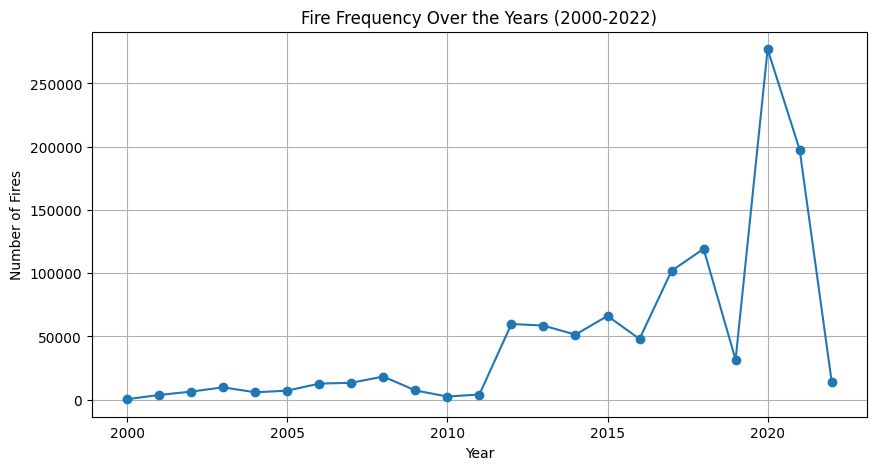

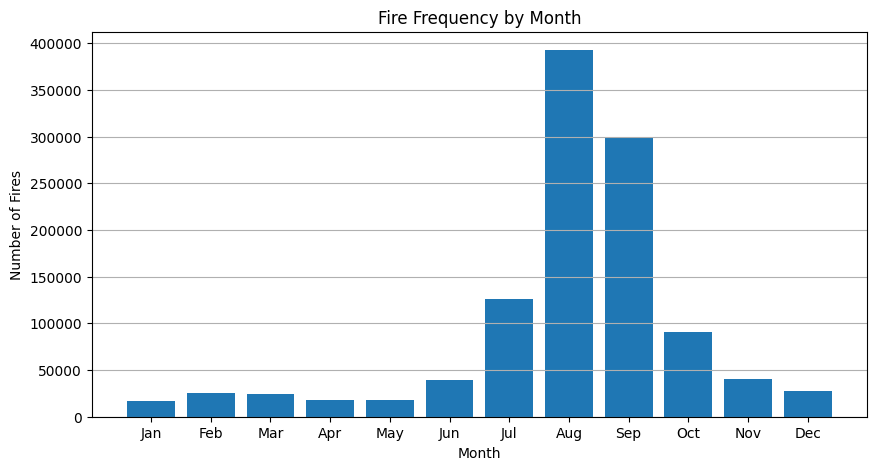

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./frequency/frequency_data/ca_daily_fire_2000_03252022.csv")

yearly_fire_counts = df['year'].value_counts().sort_index()

monthly_fire_counts = df['month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(yearly_fire_counts.index, yearly_fire_counts.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.title("Fire Frequency Over the Years (2000-2022)")
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(monthly_fire_counts.index, monthly_fire_counts.values)
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.title("Fire Frequency by Month")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis='y')
plt.show()

In [21]:
env_df = pd.read_csv("./environmental/all_conditions.csv")

env_df['Date'] = pd.to_datetime(env_df['Date'], format='%m/%d/%Y')
env_df['Year-Month'] = env_df['Date'].dt.strftime('%Y-%m')
numeric_cols = env_df.select_dtypes(include=['number']).columns
env_monthly = env_df.groupby('Year-Month')[numeric_cols].mean().reset_index()

print(env_monthly.head())

  Year-Month      Stn Id  ETo (in)  Precip (in)  Sol Rad (Ly/day)  \
0    2018-01  153.011236  0.056242     0.075451        204.709694   
1    2018-02  152.720303  0.102572     0.012345        343.988206   
2    2018-03  155.168763  0.114007     0.104046        382.150681   
3    2018-04  154.425779  0.181392     0.033323        537.929741   
4    2018-05  154.614399  0.205004     0.009867        591.478350   

   Avg Vap Pres (mBars)  Max Air Temp (F)  Min Air Temp (F)  Avg Air Temp (F)  \
0              9.269166         63.767808         41.157748         51.476378   
1              6.967762         65.493092         36.562791         50.270795   
2              9.254638         65.433438         41.998742         53.364675   
3              9.986503         73.096910         46.250053         59.437031   
4             11.737689         76.287138         51.231950         63.254445   

   Max Rel Hum (%)  Min Rel Hum (%)  Avg Rel Hum (%)  Dew Point (F)  \
0        87.881631        5

In [3]:
env_df['Year-Month']

0         2018-01
1         2018-01
2         2018-01
3         2018-01
4         2018-01
           ...   
128120    2020-09
128121    2020-09
128122    2020-09
128123    2020-09
128124    2020-09
Name: Year-Month, Length: 128125, dtype: object

In [4]:
fire_counts_df['Year-Month'] = pd.to_datetime(fire_counts_df['Year-Month']).dt.strftime('%Y-%m')
merged_df = pd.merge(fire_counts_df, env_monthly, on='Year-Month', how='inner')

print("Merged Data Shape:", merged_df.shape)
print(merged_df.head())

Merged Data Shape: (33, 18)
  Year-Month  Fire Count      Stn Id  ETo (in)  Precip (in)  Sol Rad (Ly/day)  \
0    2018-01        1697  153.011236  0.056242     0.075451        204.709694   
1    2018-02        2787  152.720303  0.102572     0.012345        343.988206   
2    2018-03        1307  155.168763  0.114007     0.104046        382.150681   
3    2018-04        1749  154.425779  0.181392     0.033323        537.929741   
4    2018-05        1266  154.614399  0.205004     0.009867        591.478350   

   Avg Vap Pres (mBars)  Max Air Temp (F)  Min Air Temp (F)  Avg Air Temp (F)  \
0              9.269166         63.767808         41.157748         51.476378   
1              6.967762         65.493092         36.562791         50.270795   
2              9.254638         65.433438         41.998742         53.364675   
3              9.986503         73.096910         46.250053         59.437031   
4             11.737689         76.287138         51.231950         63.254445   

Top 3 Environmental Factors Affecting Fire Frequency: ['Target', 'Max Air Temp (F)', 'Dew Point (F)']


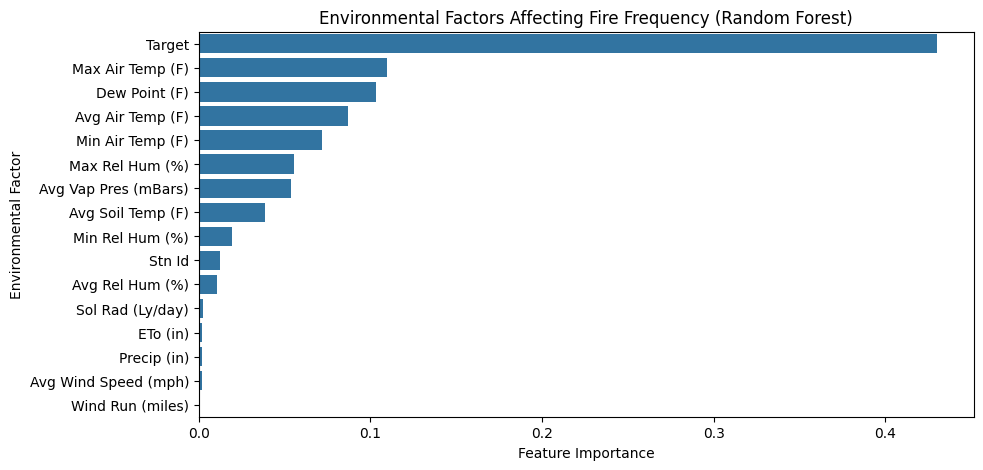

Random Forest R² Score: 0.49


In [15]:
import pandas as pd

features = merged_df.drop(columns=['Year-Month', 'Fire Count'])  # Exclude non-numeric columns
target = merged_df['Fire Count']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_names = features.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_3_factors = feature_importance_df.head(3)['Feature'].tolist()
print(f"Top 3 Environmental Factors Affecting Fire Frequency: {top_3_factors}")

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.xlabel("Feature Importance")
plt.ylabel("Environmental Factor")
plt.title("Environmental Factors Affecting Fire Frequency (Random Forest)")
plt.show()

y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R² Score: {r2_rf:.2f}")

In [16]:
X_top = merged_df[top_3_factors]
y = merged_df['Fire Count']

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R² Score using Top 3 Factors: {r2:.2f}")

R² Score using Top 3 Factors: 0.52


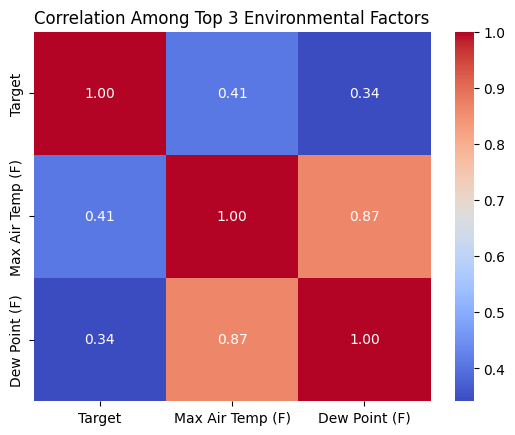

In [17]:
corr_matrix = merged_df[top_3_factors].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Among Top 3 Environmental Factors")
plt.show()


Top 3 Environmental Factors Affecting Fire Frequency (XGBoost): ['Target', 'Avg Vap Pres (mBars)', 'Min Rel Hum (%)']


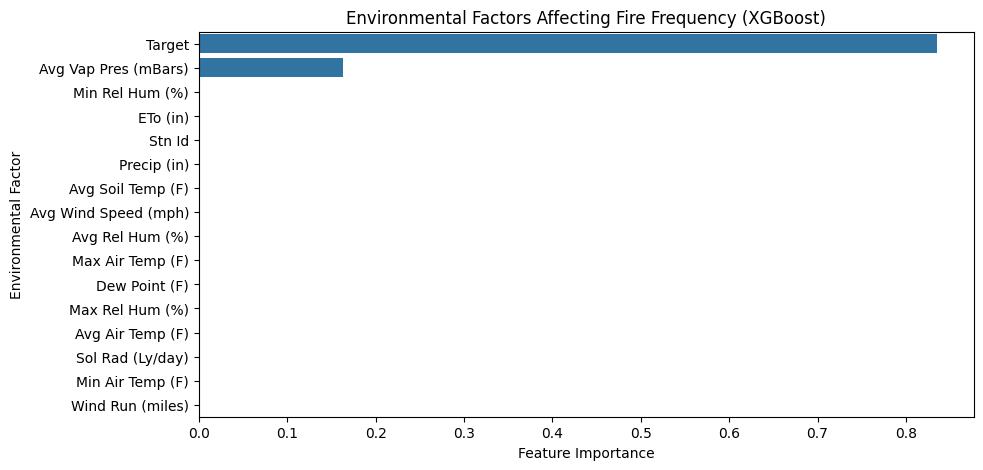

XGBoost R² Score: 0.20


In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features = merged_df.drop(columns=['Year-Month', 'Fire Count'])
target = merged_df['Fire Count']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

importances = xgb_model.feature_importances_
feature_names = features.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_3_factors_xgb = feature_importance_df.head(3)['Feature'].tolist()
print(f"Top 3 Environmental Factors Affecting Fire Frequency (XGBoost): {top_3_factors_xgb}")

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.xlabel("Feature Importance")
plt.ylabel("Environmental Factor")
plt.title("Environmental Factors Affecting Fire Frequency (XGBoost)")
plt.show()

y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost R² Score: {r2_xgb:.2f}")

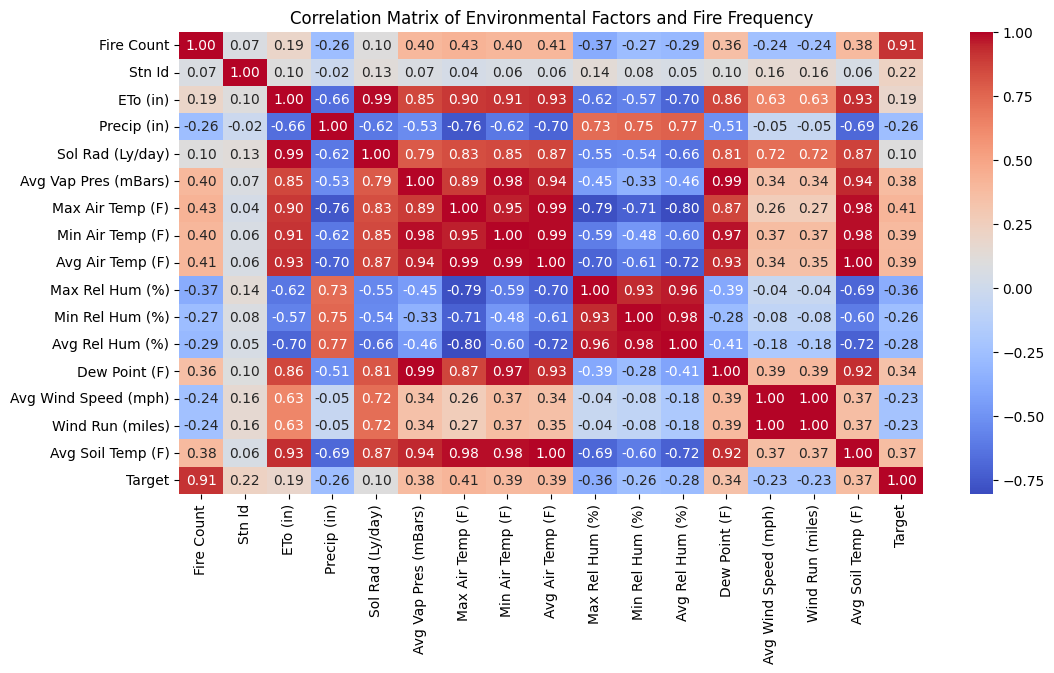

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = merged_df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Environmental Factors and Fire Frequency")
plt.show()

In [11]:
fire_corr = numeric_df.corr()['Fire Count'].abs().sort_values(ascending=False)
top_3_factors = fire_corr.index[1:4].tolist()  # Exclude 'Fire Count' itself
print(f"🔥 Top 3 Most Correlated Environmental Factors: {top_3_factors}")


🔥 Top 3 Most Correlated Environmental Factors: ['Target', 'Max Air Temp (F)', 'Avg Air Temp (F)']


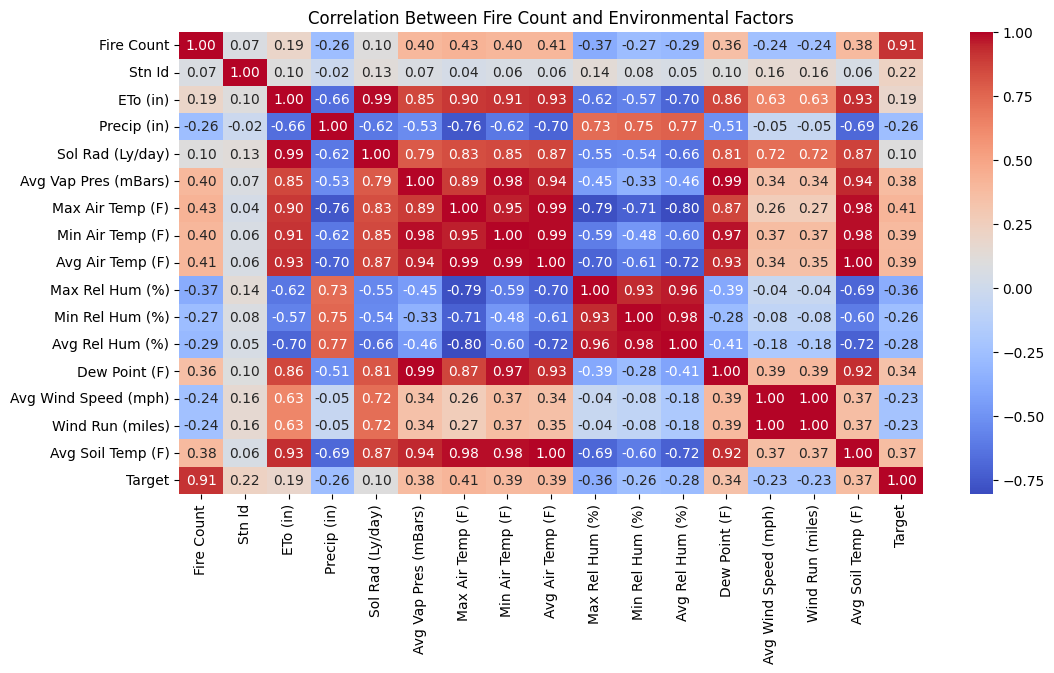

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numeric_df = merged_df.drop(columns=['Year-Month'])  # Ensure only numeric data

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Fire Count and Environmental Factors")
plt.show()

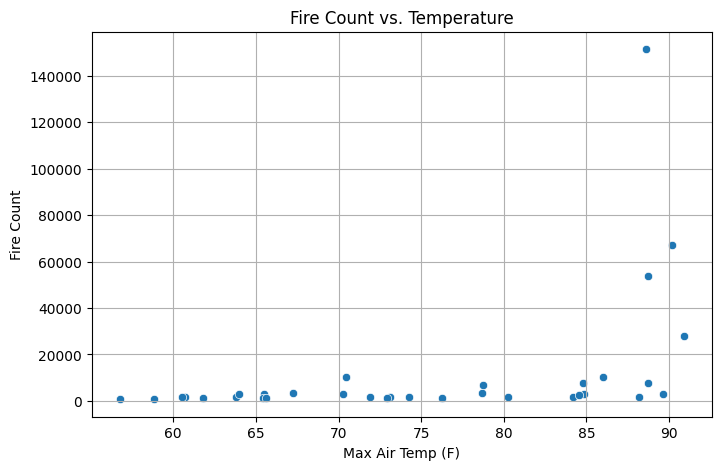

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df['Max Air Temp (F)'], y=merged_df['Fire Count'])
plt.xlabel("Max Air Temp (F)")
plt.ylabel("Fire Count")
plt.title("Fire Count vs. Temperature")
plt.grid()
plt.show()


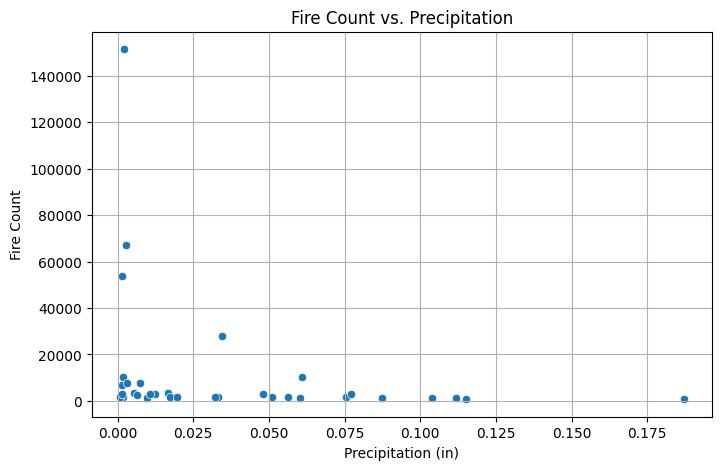

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df['Precip (in)'], y=merged_df['Fire Count'])
plt.xlabel("Precipitation (in)")
plt.ylabel("Fire Count")
plt.title("Fire Count vs. Precipitation")
plt.grid()
plt.show()


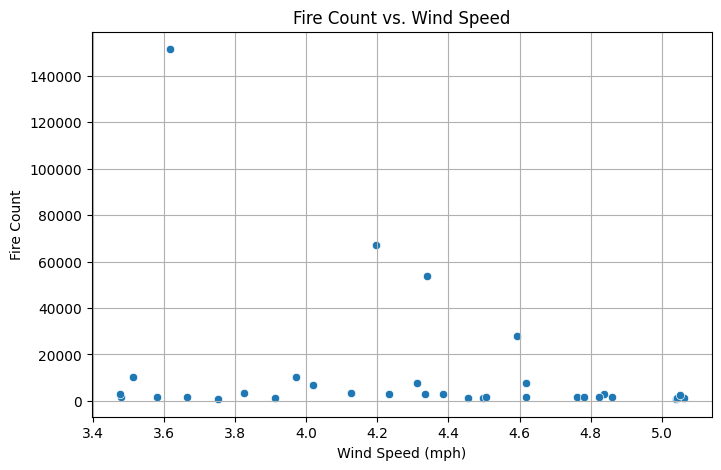

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df['Avg Wind Speed (mph)'], y=merged_df['Fire Count'])
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Fire Count")
plt.title("Fire Count vs. Wind Speed")
plt.grid()
plt.show()


In [26]:
from scipy.stats import pearsonr

# Correlation and p-value for temperature
corr_temp, p_temp = pearsonr(merged_df['Max Air Temp (F)'], merged_df['Fire Count'])
print(f"Correlation between Fire Count and Max Temp: {corr_temp:.2f} (p-value: {p_temp:.3f})")

# Correlation and p-value for precipitation
corr_precip, p_precip = pearsonr(merged_df['Precip (in)'], merged_df['Fire Count'])
print(f"Correlation between Fire Count and Precipitation: {corr_precip:.2f} (p-value: {p_precip:.3f})")

# Correlation and p-value for wind speed
corr_wind, p_wind = pearsonr(merged_df['Avg Wind Speed (mph)'], merged_df['Fire Count'])
print(f"Correlation between Fire Count and Wind Speed: {corr_wind:.2f} (p-value: {p_wind:.3f})")


Correlation between Fire Count and Max Temp: 0.43 (p-value: 0.013)
Correlation between Fire Count and Precipitation: -0.26 (p-value: 0.140)
Correlation between Fire Count and Wind Speed: -0.24 (p-value: 0.176)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# from xgboost import XGBRegressor

# merged_df['Fire Count Lag1'] = merged_df['Fire Count'].shift(1)
# merged_df['Fire Count Lag2'] = merged_df['Fire Count'].shift(2)

# Define predictors (X) and target (y)
X = merged_df[['Max Air Temp (F)', 'Precip (in)', 'Avg Wind Speed (mph)']]
y = merged_df['Fire Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest R² Score: {r2_score(y_test, y_pred_rf):.2f}")

Random Forest R² Score: 0.13


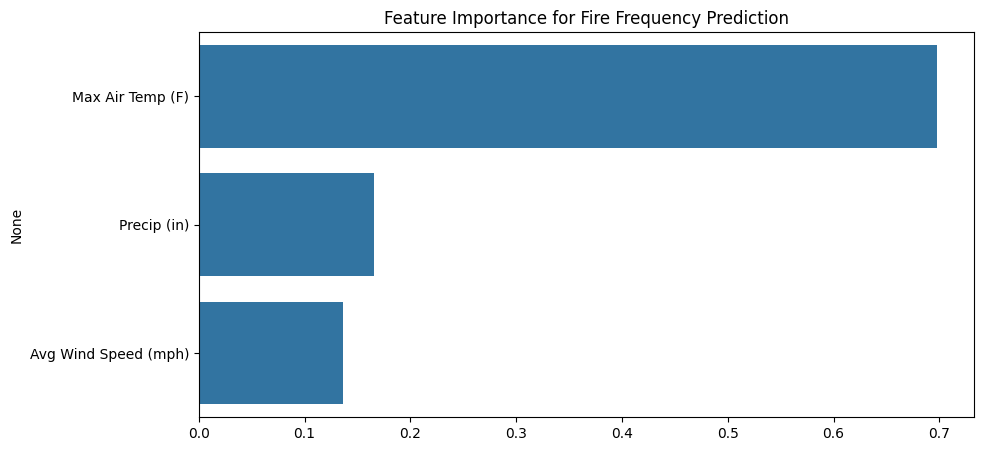

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance for Fire Frequency Prediction")
plt.show()


In [ ]:
import pandas as pd

water_df = pd.read_csv("./water_usage/water_usage.csv")
water_df.head()

In [ ]:
water_df.columns

In [ ]:
month_map = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04', 'May': '05', 'June': '06',
    'July': '07', 'August': '08', 'September': '09', 'October': '10', 'November': '11', 'December': '12'
}

# Convert month names to numeric format
water_df['Month'] = water_df['Month'].map(month_map)

# Create 'Year-Month' column in correct format
water_df['Year-Month'] = water_df['Year'].astype(str) + '-' + water_df['Month']

# Convert to datetime format for consistency
water_df['Year-Month'] = pd.to_datetime(water_df['Year-Month'], format='%Y-%m')


In [ ]:
water_df